# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A Versatile Method
<b><font color="orange" size=5>★</font> New Method:</b> pandas.Series.map()

Before we begin, we are going to introduce a versatile method to transform the data.

We can use Series.map() method.<br>
It takes a function as the input.<br>
It will apply the function to all values in the Series.

Let's create a series for the demonstration.

In [2]:
data = {'before': list(range(101, 111))}
df = pd.DataFrame(data)
df

,before
0,101
1,102
2,103
3,104
4,105
5,106
6,107
7,108
8,109
9,110


### Demo 1
Let's do this operation: Increase all odd values by 1 and all even values by 2.

Firstly, we can write a function for this operation.

In [3]:
def custom_function(x):
    if x % 2 == 1:
        x += 1
    elif x % 2 == 0:
        x += 2
    return x

Then we apply this function as the input to Series.map().

In [4]:
df['after'] = df['before'].map(custom_function)
df

,before,after
0,101,102
1,102,104
2,103,104
3,104,106
4,105,106
5,106,108
6,107,108
7,108,110
8,109,110
9,110,112


It works exactly like we want it to.

If you are a proficient Python user, we can make your code more efficient like this:

In [5]:
df['after'] = df['before'].map(lambda x: x+1 if x % 2 == 1 else x+2)
df

,before,after
0,101,102
1,102,104
2,103,104
3,104,106
4,105,106
5,106,108
6,107,108
7,108,110
8,109,110
9,110,112


### Demo 2
Let's do this operation: Conver values below 106 to "low" and values equal to or above 106 to "high".

A simple way:

In [6]:
def custom_function(x):
    if x < 106:
        return 'low'
    elif x >= 106:
        return 'high'

df['after'] = df['before'].map(custom_function)
df

,before,after
0,101,low
1,102,low
2,103,low
3,104,low
4,105,low
5,106,high
6,107,high
7,108,high
8,109,high
9,110,high


An efficient way:

In [7]:
df['after'] = df['before'].map(lambda x: 'low' if x < 106 else 'high')
df

,before,after
0,101,low
1,102,low
2,103,low
3,104,low
4,105,low
5,106,high
6,107,high
7,108,high
8,109,high
9,110,high


# 1.0 String Extraction

In [8]:
df = pd.read_csv('Groceries.csv')
df

,Member_number,Date,itemDescription
0,1808,21/7/2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19/9/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk
...,...,...,...
38760,4471,8/10/2014,sliced cheese
38761,2022,23/2/2014,candy
38762,1097,16/4/2014,cake bar
38763,1510,3/12/2014,fruit/vegetable juice


### Task
The first 2 digits in "Member_number" is the area code.<br>
Extract them into a new column called  "Area".

In [9]:
# Method 1
# Although "Member_number" does not have a numeric meaning
# but we can make use of the numeric property to extract the first 2 digit
# How? Simply divide "Member_number" column by 100 and round down (floor division)

# To use this method, we must ensure all "Member_number"s are 4-digit and there is no leading 0.
# If not, we will have to use Method 2 below

# Make a copy of df
df_copy = df.copy()

df_copy['Area'] = df['Member_number'] // 100
df_copy

,Member_number,Date,itemDescription,Area
0,1808,21/7/2015,tropical fruit,18
1,2552,5/1/2015,whole milk,25
2,2300,19/9/2015,pip fruit,23
3,1187,12/12/2015,other vegetables,11
4,3037,1/2/2015,whole milk,30
...,...,...,...,...
38760,4471,8/10/2014,sliced cheese,44
38761,2022,23/2/2014,candy,20
38762,1097,16/4/2014,cake bar,10
38763,1510,3/12/2014,fruit/vegetable juice,15


In [10]:
# Method 2
# Convert "Member_number" into string and extract the first 2 digits.

# Make a copy of df
df_copy = df.copy()

df_copy['Member_number'] = df_copy['Member_number'].astype(str)
df_copy['Area'] = df_copy['Member_number'].map(lambda x: x[:2])
df_copy

,Member_number,Date,itemDescription,Area
0,1808,21/7/2015,tropical fruit,18
1,2552,5/1/2015,whole milk,25
2,2300,19/9/2015,pip fruit,23
3,1187,12/12/2015,other vegetables,11
4,3037,1/2/2015,whole milk,30
...,...,...,...,...
38760,4471,8/10/2014,sliced cheese,44
38761,2022,23/2/2014,candy,20
38762,1097,16/4/2014,cake bar,10
38763,1510,3/12/2014,fruit/vegetable juice,15


# 2.0 Smoothing

In [11]:
df = pd.read_csv('Car Sales.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


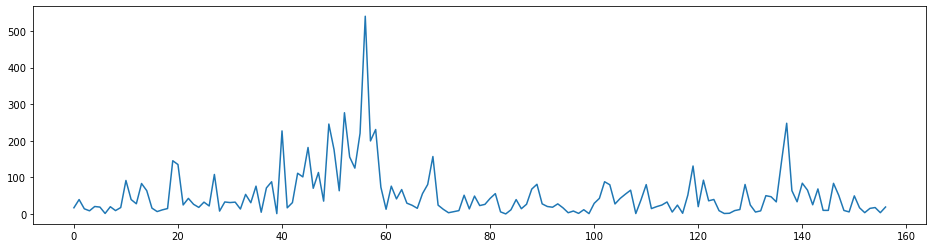

In [12]:
plt.figure(figsize=(16, 4))
plt.plot(df['Sales_in_thousands'])
plt.show()

### Task
Compute the moving average of "Sales_in_thousands".<br>
Use a rolling size of 5.

In [13]:
ma_sales = df['Sales_in_thousands'].rolling(5).mean()
ma_sales

0          NaN
1          NaN
2          NaN
3          NaN
4      19.8804
        ...   
152    17.0260
153    18.1612
154    20.5482
155    11.3542
156    11.7566
Name: Sales_in_thousands, Length: 157, dtype: float64

When we are using a rolling size of 10, the first 9 entries will not have enough data to compute the moving average.<br>
Hence, there are missing values.

By default, the rolling method uses a backward window.<br>
That means, for each entry, it takes the last 10 values (including itself) to compute the moving average.

We can use a centre window if we like.

In [14]:
ma_sales_center = df['Sales_in_thousands'].rolling(5, center=True).mean()
ma_sales_center

0          NaN
1          NaN
2      19.8804
3      20.2526
4      12.6518
        ...   
152    20.5482
153    11.3542
154    11.7566
155        NaN
156        NaN
Name: Sales_in_thousands, Length: 157, dtype: float64

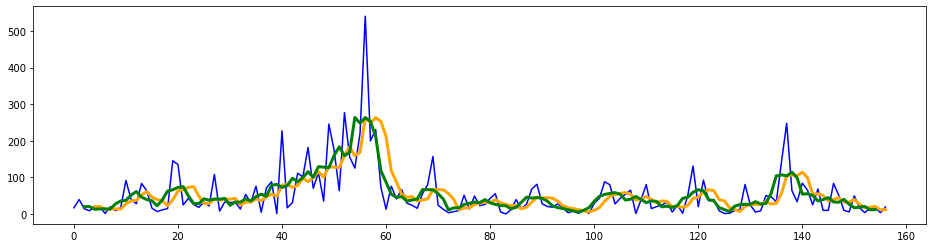

In [15]:
plt.figure(figsize=(16, 4))
plt.plot(df['Sales_in_thousands'], color='blue')
plt.plot(ma_sales, linewidth=3, color='orange')
plt.plot(ma_sales_center, linewidth=3, color='green')
plt.show()

When we use a center window, the moving average line will be shifted to the left a little bit.

# 3.0 Discretization

In [16]:
df = pd.read_csv('discretization.csv')
df

,age,hours-per-week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40
...,...,...
32556,27,38
32557,40,40
32558,58,40
32559,22,20


### Task 1
Convert "age" according to the following rules:

    -  0 <= age < 10   =>   "0 to 9"
    - 10 <= age < 20   =>   "10 to 19"
    - 20 <= age < 30   =>   "20 to 29"
    - ...

The rule is a little complex so we may not be able to write it out in one line as a lambda function.<br>
Hence, we are going to write a custom function.

In [17]:
def convert_age(age):
    if 0 <= age < 10:
        text = '0 to 9'
    elif 10 <= age < 20:
        text = '10 to 19'
    
    '''
    '''
    return text

Hang on, this is not a very elegent way to write the code.<br>
Let's try another one.

In [18]:
def convert_age(age):
    # first, we get the "floor" of the age
    # this will round down the age to the nearest multiple of 10
    # That will be the lower bound
    floor = age // 10 * 10
    
    # Then the upper bound is simply to add 9 from the floor
    ceil = floor + 9
    
    # Now we format the text
    text = '{} to {}'.format(floor, ceil)
    return text

Now, let's apply it!

In [19]:
df_copy = df.copy()

df_copy['age-category'] = df_copy['age'].map(convert_age)
df_copy

,age,hours-per-week,age-category
0,39,40,30 to 39
1,50,13,50 to 59
2,38,40,30 to 39
3,53,40,50 to 59
4,28,40,20 to 29
...,...,...,...
32556,27,38,20 to 29
32557,40,40,40 to 49
32558,58,40,50 to 59
32559,22,20,20 to 29


We can still do it by a lambda function in one line.

In [20]:
df_copy = df.copy()

df_copy['age-category'] = df_copy['age'].map(lambda x: '{} to {}'.format(x//10*10, x//10*10+9))
df_copy

,age,hours-per-week,age-category
0,39,40,30 to 39
1,50,13,50 to 59
2,38,40,30 to 39
3,53,40,50 to 59
4,28,40,20 to 29
...,...,...,...
32556,27,38,20 to 29
32557,40,40,40 to 49
32558,58,40,50 to 59
32559,22,20,20 to 29


### Task 2
Convert "hours-per-week" to 'high' if the value is larger than 30, to 'low' otherwise.

In [21]:
df_copy['hours-per-week-category'] = df_copy['hours-per-week'].map(lambda x: 'high' if x > 30 else 'low')
df_copy

,age,hours-per-week,age-category,hours-per-week-category
0,39,40,30 to 39,high
1,50,13,50 to 59,low
2,38,40,30 to 39,high
3,53,40,50 to 59,high
4,28,40,20 to 29,high
...,...,...,...,...
32556,27,38,20 to 29,high
32557,40,40,40 to 49,high
32558,58,40,50 to 59,high
32559,22,20,20 to 29,low


# 4.0 Generalization

In [22]:
df = pd.read_csv('Generalization.csv')
df

,Sample,Address
0,1,"Blk296C ,CHOA CHU KANG AVENUE 2 ,#10-1451 ,SIN..."
1,2,"Blk486 ,PASIR RIS DRIVE 4 ,#10-1908 ,SINGAPORE..."
2,3,"Blk155 ,YISHUN STREET 11 ,#10-2241 ,SINGAPORE ..."
3,4,"Blk323 ,CHOA CHU KANG AVENUE 3 ,#10-2776 ,SING..."
4,5,"Blk208 ,CLEMENTI AVENUE 6 ,#10-2875 ,SINGAPORE..."
...,...,...
195,196,"Blk546 ,BEDOK NORTH STREET 3 ,#09-3890 ,SINGAP..."
196,197,"Blk75 ,WHAMPOA DRIVE ,#09-3908 ,SINGAPORE 320075"
197,198,"Blk159 ,WOODLANDS STREET 13 ,#09-4054 ,SINGAPO..."
198,199,"Blk588 ,YIO CHU KANG ROAD ,#09-4254 ,SINGAPORE..."


### Task 1
Extract the unit number from "Address".<br>
The unit number should have the format as "#xx-xxxx".

Firstly, we need to identify the symbol to indicate the unit number.<br>
It always starts with "#" sign.<br>
Then, the " " (space) marks the end of the unit number.

Let's create 2 custom functions.

In [23]:
# Function 1: extract text from "#" sign onwards
function1 = lambda x: x[x.index('#'):]

# Function 2: extract text until " " sign"
function2 = lambda x: x[:x.index(' ')]

We can apply 2 functions consecutively.

In [24]:
df_copy = df.copy()
df_copy['unit_number'] = df_copy['Address'].map(function1).map(function2)
df_copy

,Sample,Address,unit_number
0,1,"Blk296C ,CHOA CHU KANG AVENUE 2 ,#10-1451 ,SIN...",#10-1451
1,2,"Blk486 ,PASIR RIS DRIVE 4 ,#10-1908 ,SINGAPORE...",#10-1908
2,3,"Blk155 ,YISHUN STREET 11 ,#10-2241 ,SINGAPORE ...",#10-2241
3,4,"Blk323 ,CHOA CHU KANG AVENUE 3 ,#10-2776 ,SING...",#10-2776
4,5,"Blk208 ,CLEMENTI AVENUE 6 ,#10-2875 ,SINGAPORE...",#10-2875
...,...,...,...
195,196,"Blk546 ,BEDOK NORTH STREET 3 ,#09-3890 ,SINGAP...",#09-3890
196,197,"Blk75 ,WHAMPOA DRIVE ,#09-3908 ,SINGAPORE 320075",#09-3908
197,198,"Blk159 ,WOODLANDS STREET 13 ,#09-4054 ,SINGAPO...",#09-4054
198,199,"Blk588 ,YIO CHU KANG ROAD ,#09-4254 ,SINGAPORE...",#09-4254


### Task 2
Extract the postal code from "Address"

This is relatively simple. The postal code is always written at the end of the address and the postal code in Singapore has 6 digits.

In [25]:
df_copy['postal_code'] = df_copy['Address'].map(lambda x: x[-6:])
df_copy

,Sample,Address,unit_number,postal_code
0,1,"Blk296C ,CHOA CHU KANG AVENUE 2 ,#10-1451 ,SIN...",#10-1451,683296
1,2,"Blk486 ,PASIR RIS DRIVE 4 ,#10-1908 ,SINGAPORE...",#10-1908,510486
2,3,"Blk155 ,YISHUN STREET 11 ,#10-2241 ,SINGAPORE ...",#10-2241,760155
3,4,"Blk323 ,CHOA CHU KANG AVENUE 3 ,#10-2776 ,SING...",#10-2776,689865
4,5,"Blk208 ,CLEMENTI AVENUE 6 ,#10-2875 ,SINGAPORE...",#10-2875,120208
...,...,...,...,...
195,196,"Blk546 ,BEDOK NORTH STREET 3 ,#09-3890 ,SINGAP...",#09-3890,460546
196,197,"Blk75 ,WHAMPOA DRIVE ,#09-3908 ,SINGAPORE 320075",#09-3908,320075
197,198,"Blk159 ,WOODLANDS STREET 13 ,#09-4054 ,SINGAPO...",#09-4054,730159
198,199,"Blk588 ,YIO CHU KANG ROAD ,#09-4254 ,SINGAPORE...",#09-4254,787072


# 5.0 Attribute Construction

In [26]:
df = pd.read_csv('Superstore.csv')
df

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount
0,7981,3/1/2013,7/1/2013,16.448,2,0.2
1,740,4/1/2013,8/1/2013,11.784,3,0.2
2,741,4/1/2013,8/1/2013,272.736,3,0.2
3,742,4/1/2013,8/1/2013,3.540,2,0.8
4,1760,5/1/2013,12/1/2013,19.536,3,0.2
...,...,...,...,...,...,...
4993,480,27/6/2015,3/7/2015,14.700,5,0.0
4994,481,27/6/2015,3/7/2015,704.250,5,0.0
4995,1286,27/6/2015,4/7/2015,14.900,5,0.0
4996,1694,27/6/2015,30/6/2015,13.616,2,0.2


### Task 1
Create a variable, "DateDiff", by getting the difference in days between "Ship Date" and "Order Date".<br>
"Ship Date" should be no earlier than "Order Date".

Firstly, let's check the date type of "Ship Date" (or "Order Date").

In [27]:
df_copy = df.copy()
df_copy['Ship Date']

0        7/1/2013
1        8/1/2013
2        8/1/2013
3        8/1/2013
4       12/1/2013
          ...    
4993     3/7/2015
4994     3/7/2015
4995     4/7/2015
4996    30/6/2015
4997     4/7/2015
Name: Ship Date, Length: 4998, dtype: object

The data type is "object". We can't use it for mathematical operation.

We need to convert it to a "datetime" object.<br>
We can use pd.to_datetime() function to do that.<br>
We need to configure the format according to our date format in the dataset.

In [28]:
df_copy['Ship Date'] = pd.to_datetime(df_copy['Ship Date'], format='%d/%m/%Y')
df_copy['Ship Date']

0      2013-01-07
1      2013-01-08
2      2013-01-08
3      2013-01-08
4      2013-01-12
          ...    
4993   2015-07-03
4994   2015-07-03
4995   2015-07-04
4996   2015-06-30
4997   2015-07-04
Name: Ship Date, Length: 4998, dtype: datetime64[ns]

Then we do the same for "Order Date".

In [29]:
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'], format='%d/%m/%Y')
df_copy['Order Date']

0      2013-01-03
1      2013-01-04
2      2013-01-04
3      2013-01-04
4      2013-01-05
          ...    
4993   2015-06-27
4994   2015-06-27
4995   2015-06-27
4996   2015-06-27
4997   2015-06-27
Name: Order Date, Length: 4998, dtype: datetime64[ns]

As our data are in the correct format now, we can apply mathematical operation to them now.

In [30]:
df_copy['Ship Date'] - df_copy['Order Date']

0      4 days
1      4 days
2      4 days
3      4 days
4      7 days
        ...  
4993   6 days
4994   6 days
4995   7 days
4996   3 days
4997   7 days
Length: 4998, dtype: timedelta64[ns]

If we do a substraction on "datetime" objects, we will get "timedelta" objects.

We can see that, there is "days" in the value.
If we only want to keep the numeric part, we can call .dt.days attribute after 

In [31]:
(df_copy['Ship Date'] - df_copy['Order Date']).dt.days

0       4
1       4
2       4
3       4
4       7
       ..
4993    6
4994    6
4995    7
4996    3
4997    7
Length: 4998, dtype: int64

Now, we can save it as a new column.

In [32]:
# Scroll to the right side to see the new column.
df_copy['DateDiff'] = (df_copy['Ship Date'] - df_copy['Order Date']).dt.days
df_copy

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,DateDiff
0,7981,2013-01-03,2013-01-07,16.448,2,0.2,4
1,740,2013-01-04,2013-01-08,11.784,3,0.2,4
2,741,2013-01-04,2013-01-08,272.736,3,0.2,4
3,742,2013-01-04,2013-01-08,3.540,2,0.8,4
4,1760,2013-01-05,2013-01-12,19.536,3,0.2,7
...,...,...,...,...,...,...,...
4993,480,2015-06-27,2015-07-03,14.700,5,0.0,6
4994,481,2015-06-27,2015-07-03,704.250,5,0.0,6
4995,1286,2015-06-27,2015-07-04,14.900,5,0.0,7
4996,1694,2015-06-27,2015-06-30,13.616,2,0.2,3


### Task 2
Create a column, "Total_Sales", by this formula:

    Total_Sales = (Sales * Quantity) * (1 - Discount)
    
These variables are all in numeric format.<br>
We can apply mathematical operation on them directly.

In [33]:
# Scroll to the right side to see the new column.
df_copy['Total_Sales'] = (df_copy['Sales'] * df_copy['Quantity']) * (1 - df_copy['Discount'])
df_copy

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,DateDiff,Total_Sales
0,7981,2013-01-03,2013-01-07,16.448,2,0.2,4,26.3168
1,740,2013-01-04,2013-01-08,11.784,3,0.2,4,28.2816
2,741,2013-01-04,2013-01-08,272.736,3,0.2,4,654.5664
3,742,2013-01-04,2013-01-08,3.540,2,0.8,4,1.4160
4,1760,2013-01-05,2013-01-12,19.536,3,0.2,7,46.8864
...,...,...,...,...,...,...,...,...
4993,480,2015-06-27,2015-07-03,14.700,5,0.0,6,73.5000
4994,481,2015-06-27,2015-07-03,704.250,5,0.0,6,3521.2500
4995,1286,2015-06-27,2015-07-04,14.900,5,0.0,7,74.5000
4996,1694,2015-06-27,2015-06-30,13.616,2,0.2,3,21.7856


### Task 3
Create a column, "Average_State_Temperature", by mapping the follow values to "State".

    - Delaware: 12.9
    - Louisiana: 19.1
    - South Carolina: 16.9
    - Ohio: 10.4
    - Oregon: 9.1
    - Arizona: 15.7

For the states not listed above, set the value to <b>None</b>.

Let's take a look at "State" first.

In [34]:
df_copy['State']

KeyError: 'State'

We can do it in 2 ways.

In [ ]:
# Method 1
# Use Series.map() method

mapping_dictionary = {'Delaware': 12.9,
                      'Lousiana': 19.1,
                      'South Carolina': 16.9,
                      'Ohio': 10.4,
                      'Oregon': 9.1,
                      'Arizona': 15.7}
df_copy['Average_State_Temperature'] = df_copy['State'].map(mapping_dictionary)
df_copy['Average_State_Temperature']

We can't see the change as there is no state in the list in the top and the bottom 5 rows.<br>
We need to apply a filter to see it.

In [ ]:
mask = df_copy['State'].isin(mapping_dictionary.keys())
df_copy[mask][['State', 'Average_State_Temperature']]

# 6.0 Scaling

In [ ]:
df = pd.read_csv('Abalone.csv', header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight',
              'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
df

In [ ]:
print(df['Rings'].describe())

plt.figure(figsize=(16,4))
df['Rings'].hist(bins=20)
plt.show()

We can see that, "Rings" are distributed around 10, ranging from 3 to 23 approximately.

### Task 1
Scale it down by min-max normalization by
    
    x_new = (x_old - minimum) / (maximum - minimum)
    
Scaled data will fall between 0 to 1, where 0 and 1 corresponds to the minimum and the maximum respectively.

In [ ]:
df_copy = df.copy()
df_copy['Rings_scaled'] = (df['Rings'] - df['Rings'].min()) / (df['Rings'].max() - df['Rings'].min())

In [ ]:
print(df_copy['Rings_scaled'].describe())

plt.figure(figsize=(16,4))
df_copy['Rings_scaled'].hist(bins=20)
plt.show()

We can see that, now "Rings_scaled" are distributed around 0.3, ranging from 0 to 1.

### Task 2
Scale it down by z-score standardization by
    
    x_new = (x_old - mean) / standard_deviation
    
Scaled data will fall around 0.

In [ ]:
df_copy = df.copy()
df_copy['Rings_scaled'] = (df['Rings'] - df['Rings'].mean()) / df['Rings'].std()

In [ ]:
print(df_copy['Rings_scaled'].describe())

plt.figure(figsize=(16,4))
df_copy['Rings_scaled'].hist(bins=20)
plt.show()

We can see that, now "Rings_scaled" are distributed around 0.